## ÇOKLU_LİNEAR REGRESYON : 

Birden fazla bağımsız değişkenin olduğu olduğu regresyon modelidir. Her bağımsız değişkenin bağımlı değişken arasında ki ilişkiyi korelasyonunu modeller.

Gerçek hayattan bir örnek ile yapalım.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("tutun_multilineargression.csv", sep=";")

 elimizde tütün fiyatları ile ilgili gerçek hayattan alınmış ilk 11 tanesi üzerinde çalışma yapacağımız bir veri seti var.

### TEORİ : 

In [52]:
df

,tutun_miktar,gubre_kg,fiyat
0,59.2,76.2,23.50
1,65.4,91.7,24.50
2,62.3,106.7,32.10
3,64.7,111.6,32.40
4,67.4,119.0,31.11
5,64.4,129.2,34.10
6,68.0,143.4,35.30
7,73.4,159.6,38.70
8,75.7,180.0,39.60
9,70.7,193.0,46.70


In [53]:
# 1. adım : değişkenlerin toplamlarını bulalım.
x1_sum = int(df["tutun_miktar"].sum())
x2_sum = int(df["gubre_kg"].sum())
y_sum = int(df["fiyat"].sum())
print(x1_sum , " ", x2_sum ," ", y_sum)

671   1310   338


In [54]:
# 2. adım her bağımsız değişkeni bağımlı değişken ile çarpıp toplamlarını bulalım.
yx1 = int((df["tutun_miktar"] * df["fiyat"]).sum())
yx2 = int((df["gubre_kg"] * df["fiyat"]).sum())
print(yx1, " ",yx2)

22922   46565


In [56]:
# 3. adım bağımsız değişkenlerin karelerinin toplamları : 
x1_kare = int((df["tutun_miktar"]**2).sum())
x2_kare = int((df["gubre_kg"]**2).sum())
print(x1_kare, " ",x2_kare)

45279   184593


In [57]:
# 4. adım : bağımsız değişkenlerin kendi aralarında çarpımlarının toplamları : 
x1x2 = int((df["tutun_miktar"] * df["gubre_kg"]).sum())
print(x1x2)

89454


In [58]:
n = len(df["fiyat"])
n

10

 5. adım denklemi yazalım .
 
y_sum = n*b1 + x1_sum*b2 + x2_sum*b3

yx1 = b1*x1_sum + b2*x1_kare + b3*x1x2

yx2 = b1*x2_sum + b2*x1x2 + b3*x2_kare

In [ ]:
338 = b1*10+ b2*671 + b3*1310
22922 = b1*671 + b2*45279 + b3*89454
46565 = b1*1310 + b2*89454 + b3*184593

In [59]:
a,b1,b2 = np.linalg.solve(np.array([[10,671,1310],[671,45279,89454],[1310,89454,184593]]),np.array([338,22922,46565]))
a = round(a,1)
b1 = round(b1,2)
b2 = round(b2,2)
print("sabit intercept değeri = ", a)
print("katsayı b1 değeri = ", b1)
print("katsayı b2 değeri = ", b2)

sabit intercept değeri =  34.1
katsayı b1 değeri =  -0.45
katsayı b2 değeri =  0.23


Y = 34.1 + b1*X1 + b2*X2

In [60]:
df["tahmin_one"] = a + b1*df["tutun_miktar"] + b2*df["gubre_kg"]
df

,tutun_miktar,gubre_kg,fiyat,tahmin_one
0,59.2,76.2,23.50,24.986
1,65.4,91.7,24.50,25.761
2,62.3,106.7,32.10,30.606
3,64.7,111.6,32.40,30.653
4,67.4,119.0,31.11,31.140
5,64.4,129.2,34.10,34.836
6,68.0,143.4,35.30,36.482
7,73.4,159.6,38.70,37.778
8,75.7,180.0,39.60,41.435
9,70.7,193.0,46.70,46.675


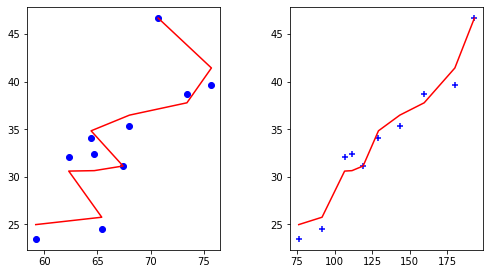

In [62]:
fig,((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
ax1.scatter(df.tutun_miktar, df.fiyat, marker="o", color="blue")
ax1.plot(df.tutun_miktar, df.tahmin_one, color="red")
ax2.scatter(df.gubre_kg, df.fiyat, marker="+", color="blue")
ax2.plot(df.gubre_kg, df.tahmin_one, color="red")
plt.tight_layout(pad=5)
plt.show()

## PYTHON İLE YAPALIM : 

In [63]:
from sklearn import linear_model
# sklearn kütüphanesinden linear_modeli import ettik.

In [64]:
reg = linear_model.LinearRegression()
# reg değişkenine LinearRegresyon fonksiyonunu attım.

In [65]:
reg.fit(df[["tutun_miktar","gubre_kg"]], df["fiyat"])
# reg ile fit ettik yani makinaya öğrettik.

LinearRegression()

In [66]:
t = list(reg.predict(df[["tutun_miktar","gubre_kg"]]))
t1 = []
for i in t:
    t1.append(round(i,2))
df["tahmin_two"] = t1
df

,tutun_miktar,gubre_kg,fiyat,tahmin_one,tahmin_two
0,59.2,76.2,23.50,24.986,24.95
1,65.4,91.7,24.50,25.761,25.32
2,62.3,106.7,32.10,30.606,30.57
3,64.7,111.6,32.40,30.653,30.45
4,67.4,119.0,31.11,31.140,30.77
5,64.4,129.2,34.10,34.836,34.82
6,68.0,143.4,35.30,36.482,36.28
7,73.4,159.6,38.70,37.778,37.25
8,75.7,180.0,39.60,41.435,40.89
9,70.7,193.0,46.70,46.675,46.69


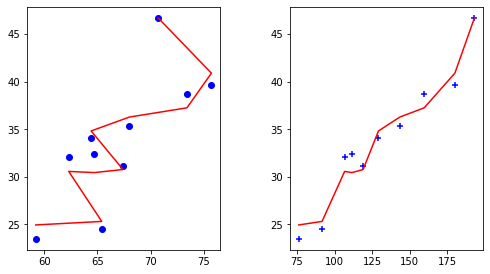

In [67]:
fig,((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
ax1.scatter(df.tutun_miktar, df.fiyat, marker="o", color="blue")
ax1.plot(df.tutun_miktar, df.tahmin_two, color="red")
ax2.scatter(df.gubre_kg, df.fiyat, marker="+", color="blue")
ax2.plot(df.gubre_kg, df.tahmin_two, color="red")
plt.tight_layout(pad=5)
plt.show()

Bir örnek daha yapalım. Bu sefer 3 tane bağımsız değişken olsun.

In [68]:
df2 = pd.read_csv("multilinearregression.csv", sep=";")
df2

,alan,odasayisi,binayasi,fiyat
0,180,5,10,510000
1,225,4,18,508000
2,260,3,2,548000
3,320,6,10,650000
4,335,4,9,628000
5,345,5,14,632000
6,355,3,0,680000
7,400,4,10,725000


In [69]:
from sklearn import linear_model

In [70]:
reg = linear_model.LinearRegression()

In [72]:
reg.fit(df2[["alan","odasayisi","binayasi"]], df2["fiyat"])

LinearRegression()

In [73]:
e = list(reg.predict(df2[["alan","odasayisi","binayasi"]]))
e1 = []
for i in e : 
    e1.append(round(i,2))
df2["tahmin"] = e1
df2

,alan,odasayisi,binayasi,fiyat,tahmin
0,180,5,10,510000,494187.18
1,225,4,18,508000,504294.83
2,260,3,2,548000,566772.90
3,320,6,10,650000,651740.82
4,335,4,9,628000,639844.84
5,345,5,14,632000,651895.22
6,355,3,0,680000,668791.14
7,400,4,10,725000,703473.06


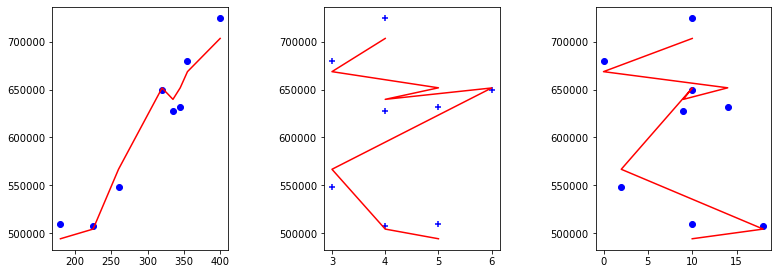

In [75]:
fig,((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax1.scatter(df2.alan, df2.fiyat, marker="o", color="blue")
ax1.plot(df2.alan, df2.tahmin, color="red")
ax2.scatter(df2.odasayisi, df2.fiyat, marker="+", color="blue")
ax2.plot(df2.odasayisi, df2.tahmin, color="red")
ax3.scatter(df2.binayasi, df2.fiyat, color="blue")
ax3.plot(df2.binayasi, df2.tahmin, color="red")
plt.tight_layout(pad=5)
plt.show()